In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, ensemble
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

#data = pd.read_csv('../Prac/Data/nflplaybyplay2009to2016/NFL Play by Play 2009-2018 (v5).csv')

data = pd.read_csv('../Prac/nflscrapR-data/play_by_play_data/regular_season/reg_pbp_2018.csv')
#/Users/jefferymccracken/Prac/nflscrapR-data/play_by_play_data/regular_season/reg_pbp_2018.csv

In [90]:
data.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,37,2018090600,PHI,ATL,ATL,away,PHI,PHI,35.0,2018-09-06,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1,52,2018090600,PHI,ATL,ATL,away,PHI,ATL,75.0,2018-09-06,...,00-0027215,L.Paulsen,5.0,0,NaN,False Start,0.0,0.0,0.0,0.0
2,75,2018090600,PHI,ATL,ATL,away,PHI,ATL,80.0,2018-09-06,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
3,104,2018090600,PHI,ATL,ATL,away,PHI,ATL,70.0,2018-09-06,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
4,125,2018090600,PHI,ATL,ATL,away,PHI,ATL,59.0,2018-09-06,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


In [91]:
data.shape

(45143, 256)

In [92]:
pass_data = data[data['pass_attempt'] == 1]
pass_data = pass_data[[ 'game_id', 'pass_attempt', 'yrdln', 'receiver_player_name', 'ydstogo', 'defteam', 'posteam', 'yards_gained', 'touchdown', 'passer_player_name', 'complete_pass','incomplete_pass', 'pass_length', 'pass_location', 'score_differential', 'posteam_score']]
pass_data['posteam'].fillna(value = 'NA', inplace = True)

In [93]:
pass_data.head()

,game_id,pass_attempt,yrdln,receiver_player_name,ydstogo,defteam,posteam,yards_gained,touchdown,passer_player_name,complete_pass,incomplete_pass,pass_length,pass_location,score_differential,posteam_score
2,2018090600,1.0,ATL 20,J.Jones,15,PHI,ATL,10,0.0,M.Ryan,1.0,0.0,short,right,0.0,0.0
5,2018090600,1.0,PHI 39,C.Ridley,10,PHI,ATL,0,0.0,M.Ryan,0.0,1.0,short,right,0.0,0.0
6,2018090600,1.0,PHI 39,D.Freeman,10,PHI,ATL,0,0.0,M.Ryan,0.0,1.0,short,left,0.0,0.0
7,2018090600,1.0,PHI 39,J.Jones,10,PHI,ATL,33,0.0,M.Ryan,1.0,0.0,deep,left,0.0,0.0
10,2018090600,1.0,PHI 1,D.Freeman,1,PHI,ATL,0,0.0,M.Ryan,0.0,1.0,short,right,0.0,0.0


Text(0.5, 0.98, 'Defense Against Short and Deep Passes')

<Figure size 864x864 with 0 Axes>

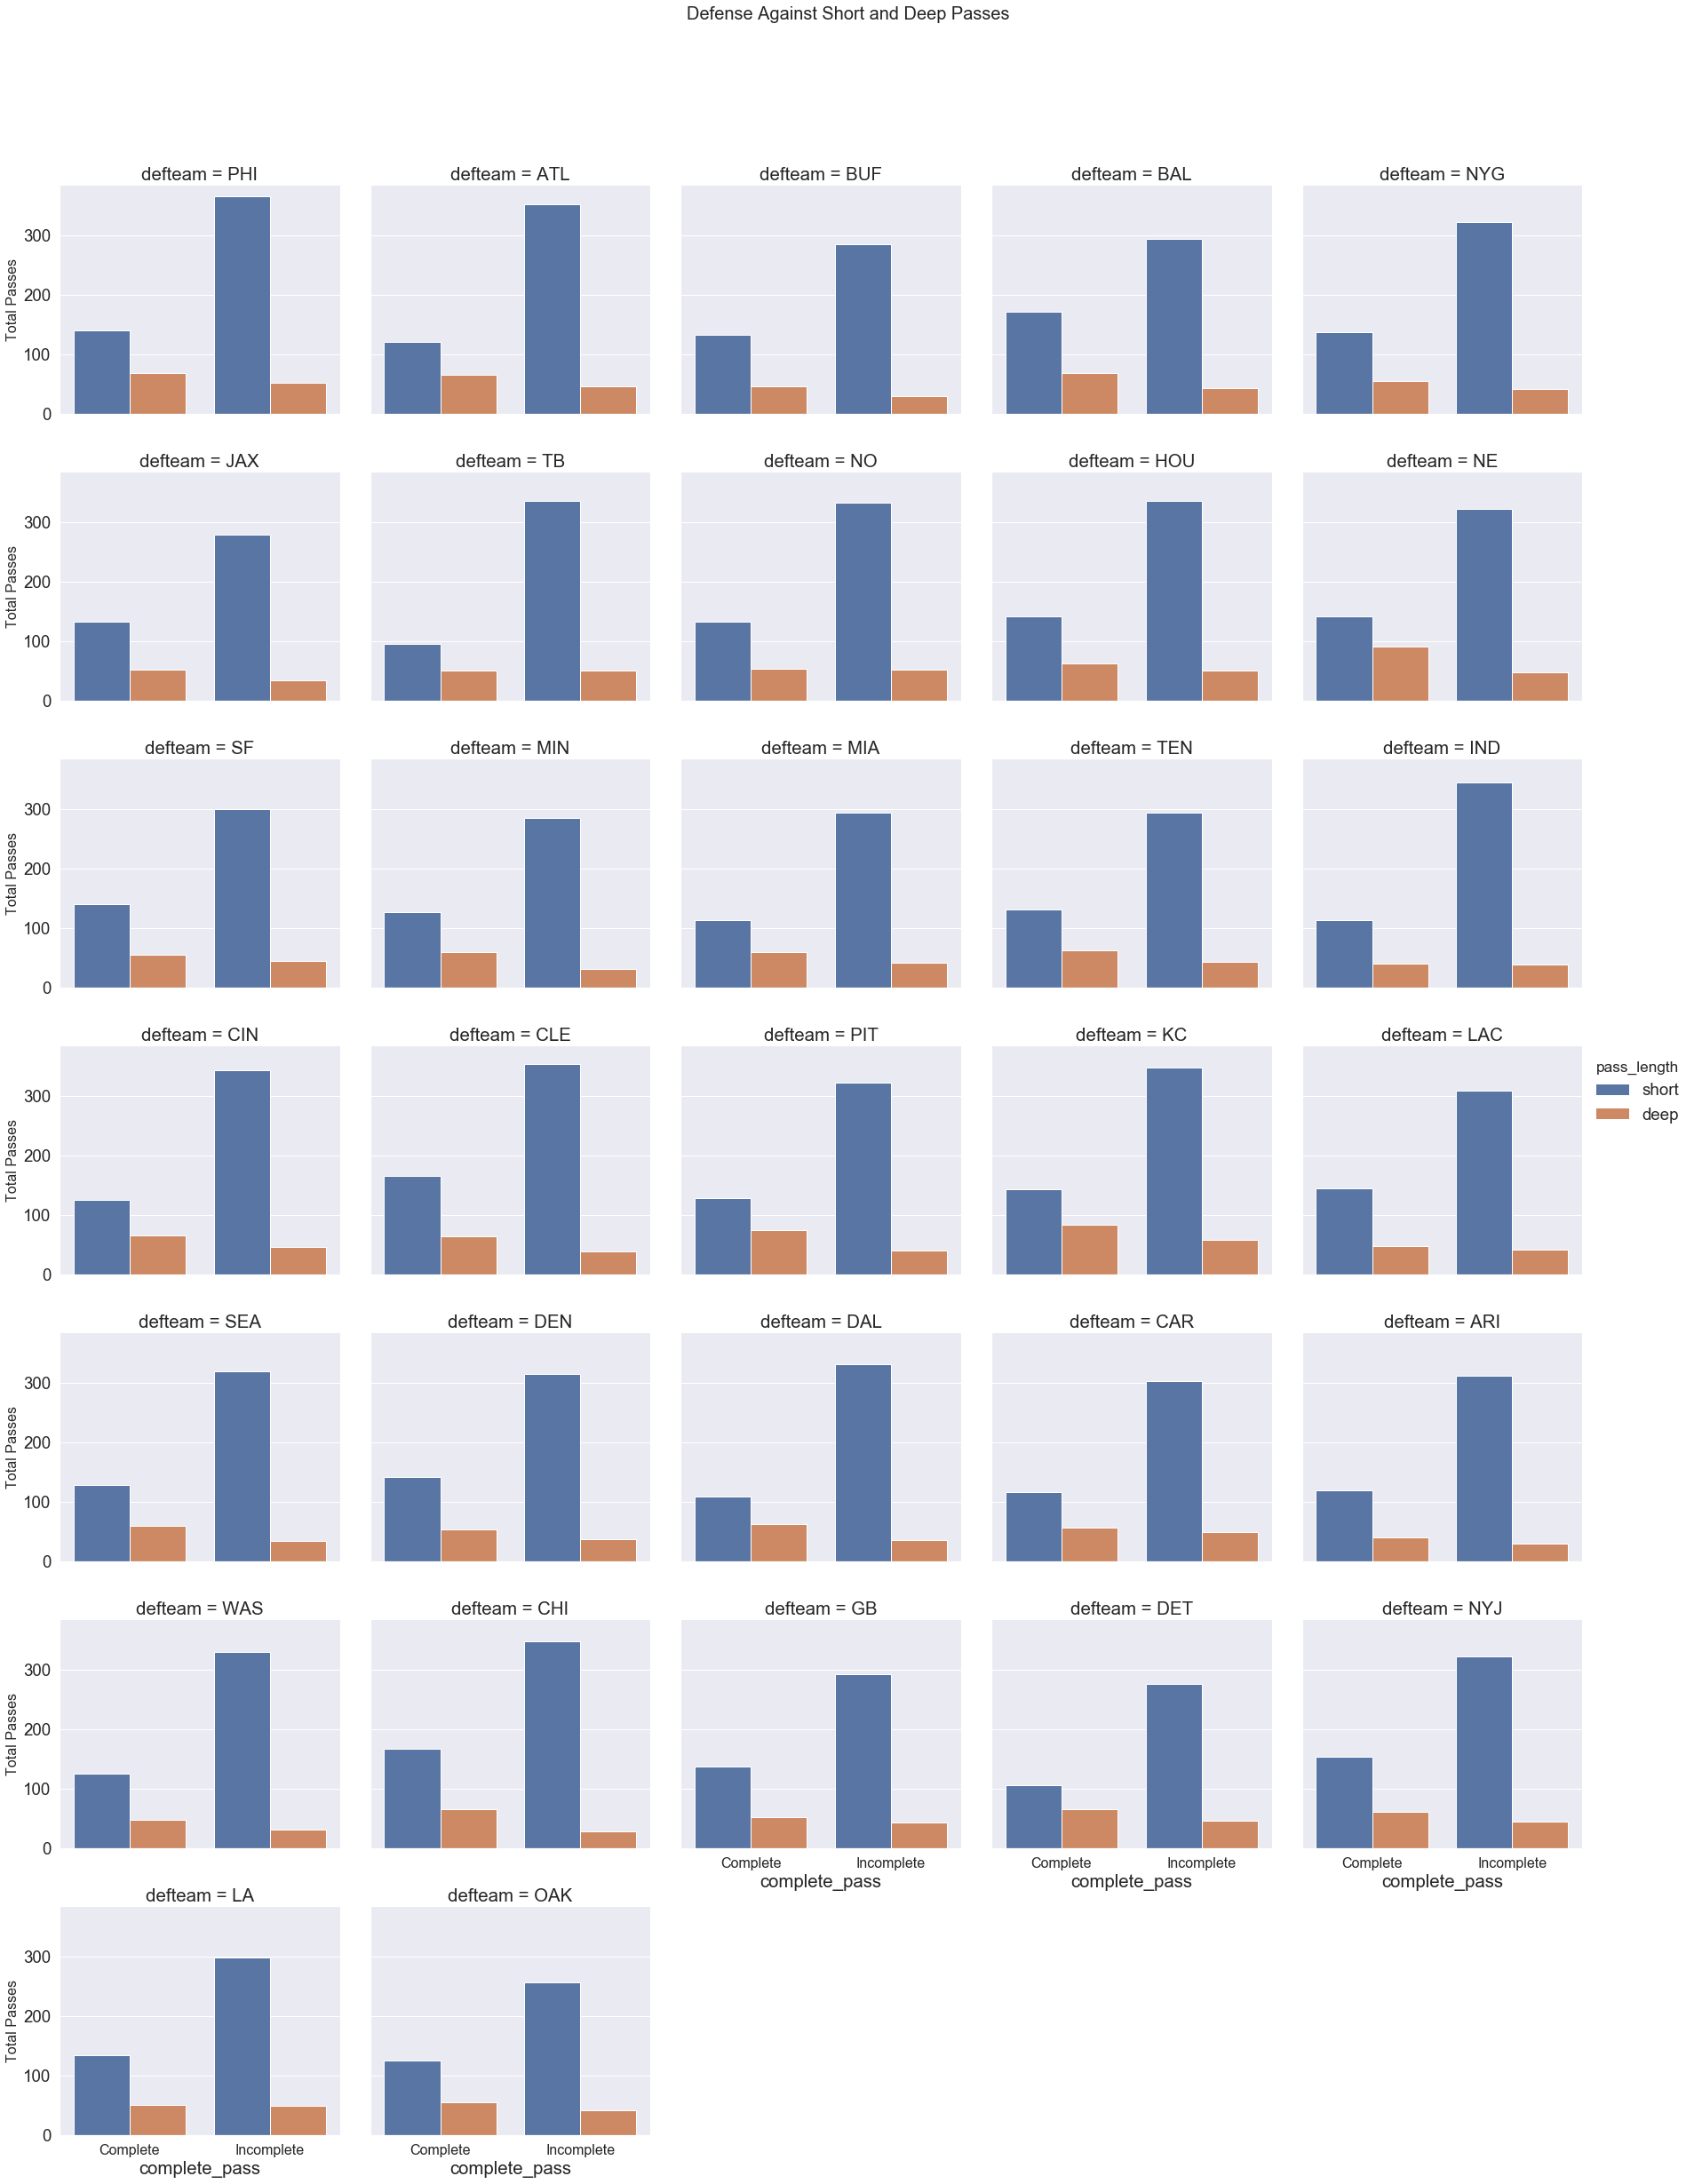

In [94]:
plt.figure(figsize= (12, 12))
sns.set(font_scale = 1.7)
ax = sns.factorplot("complete_pass",hue = 'pass_length', col = 'defteam',kind = 'count',  data = pass_data, col_wrap = 5)
ax.set_ylabels('Total Passes', fontsize = 16)
ax.set_xticklabels({ 'Complete' : 1,  'Incomplete' :0}, fontsize = 16)
plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Defense Against Short and Deep Passes', fontsize =20)

#need to combine 
#JAX and JAC
#STL and LA
# SD and LAC


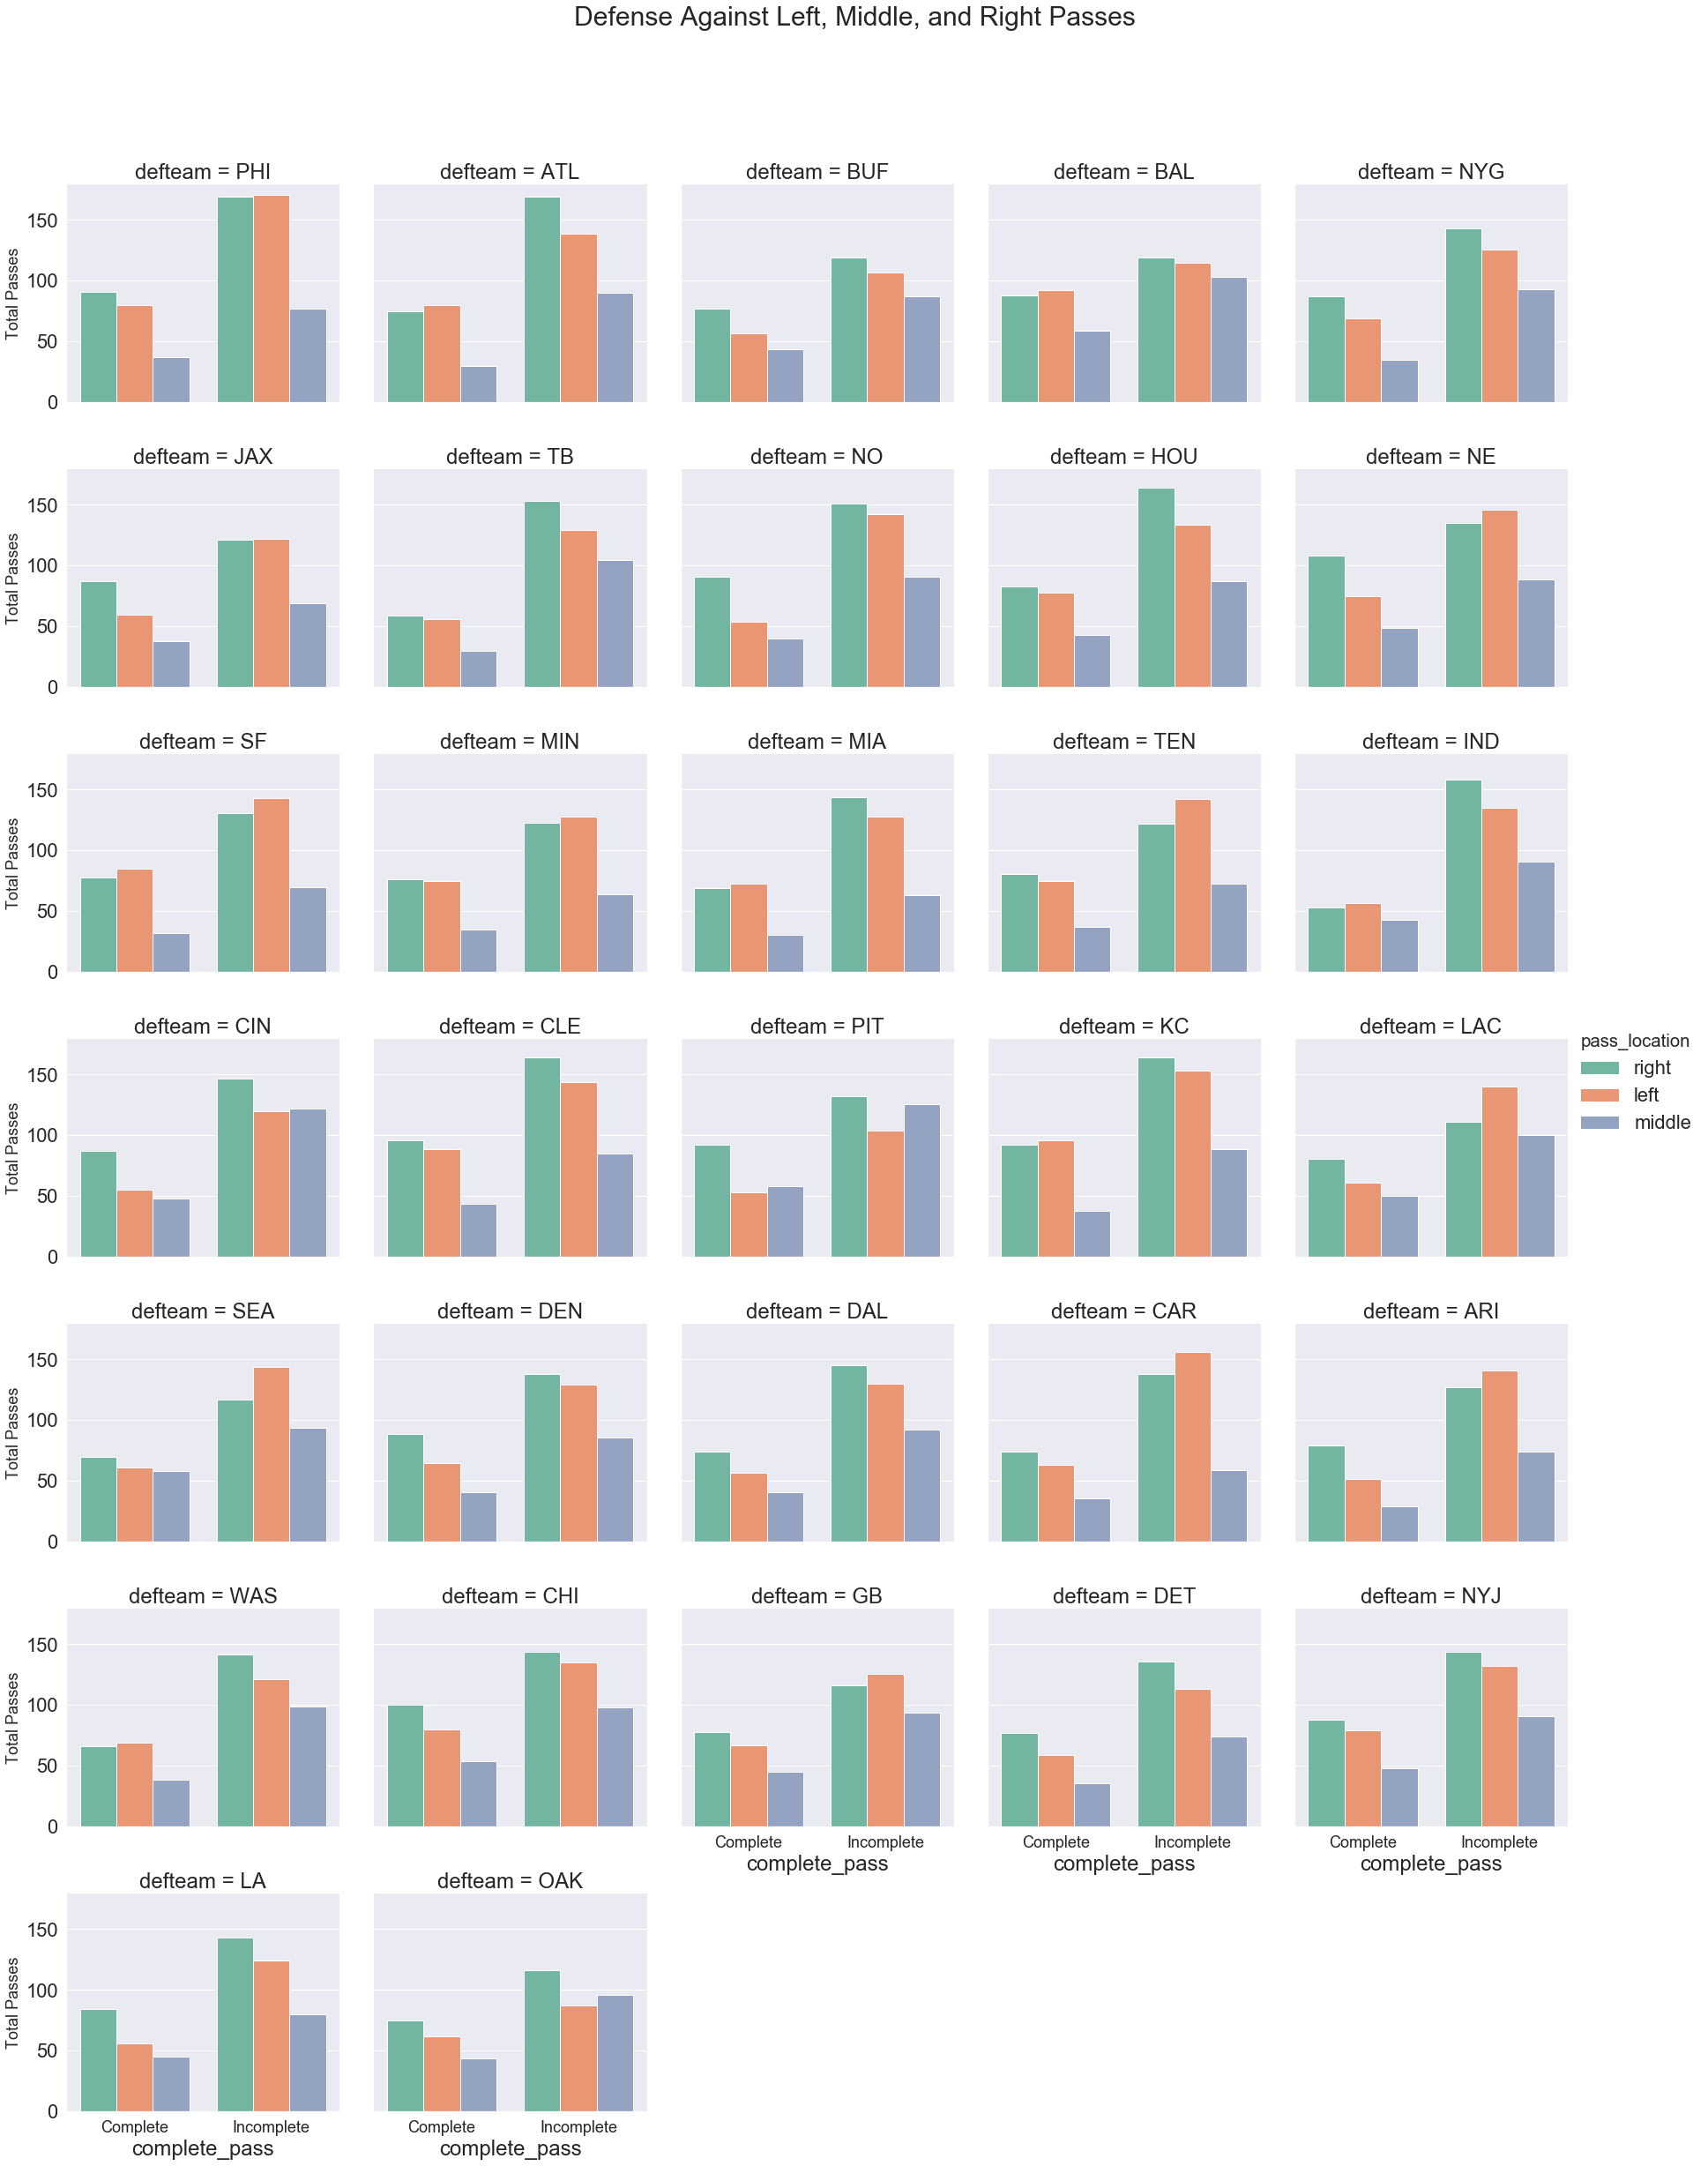

In [95]:
sns.set(font_scale = 2)
ax =sns.factorplot("complete_pass",hue = 'pass_location', col = 'defteam', kind = 'count', palette = "Set2", data = pass_data, col_wrap = 5)
ax.set_ylabels('Total Passes', fontsize = 18)

ax.set_titles( fontsize = 18)
plt.subplots_adjust(top = 0.9)
ax.fig.suptitle('Defense Against Left, Middle, and Right Passes', fontsize = 30)
ax.set_xticklabels({'Complete': 1, 'Incomplete': 0}, fontsize = 18)

Text(0.5, 0.98, 'Complete vs. Incomplete')

<Figure size 864x864 with 0 Axes>

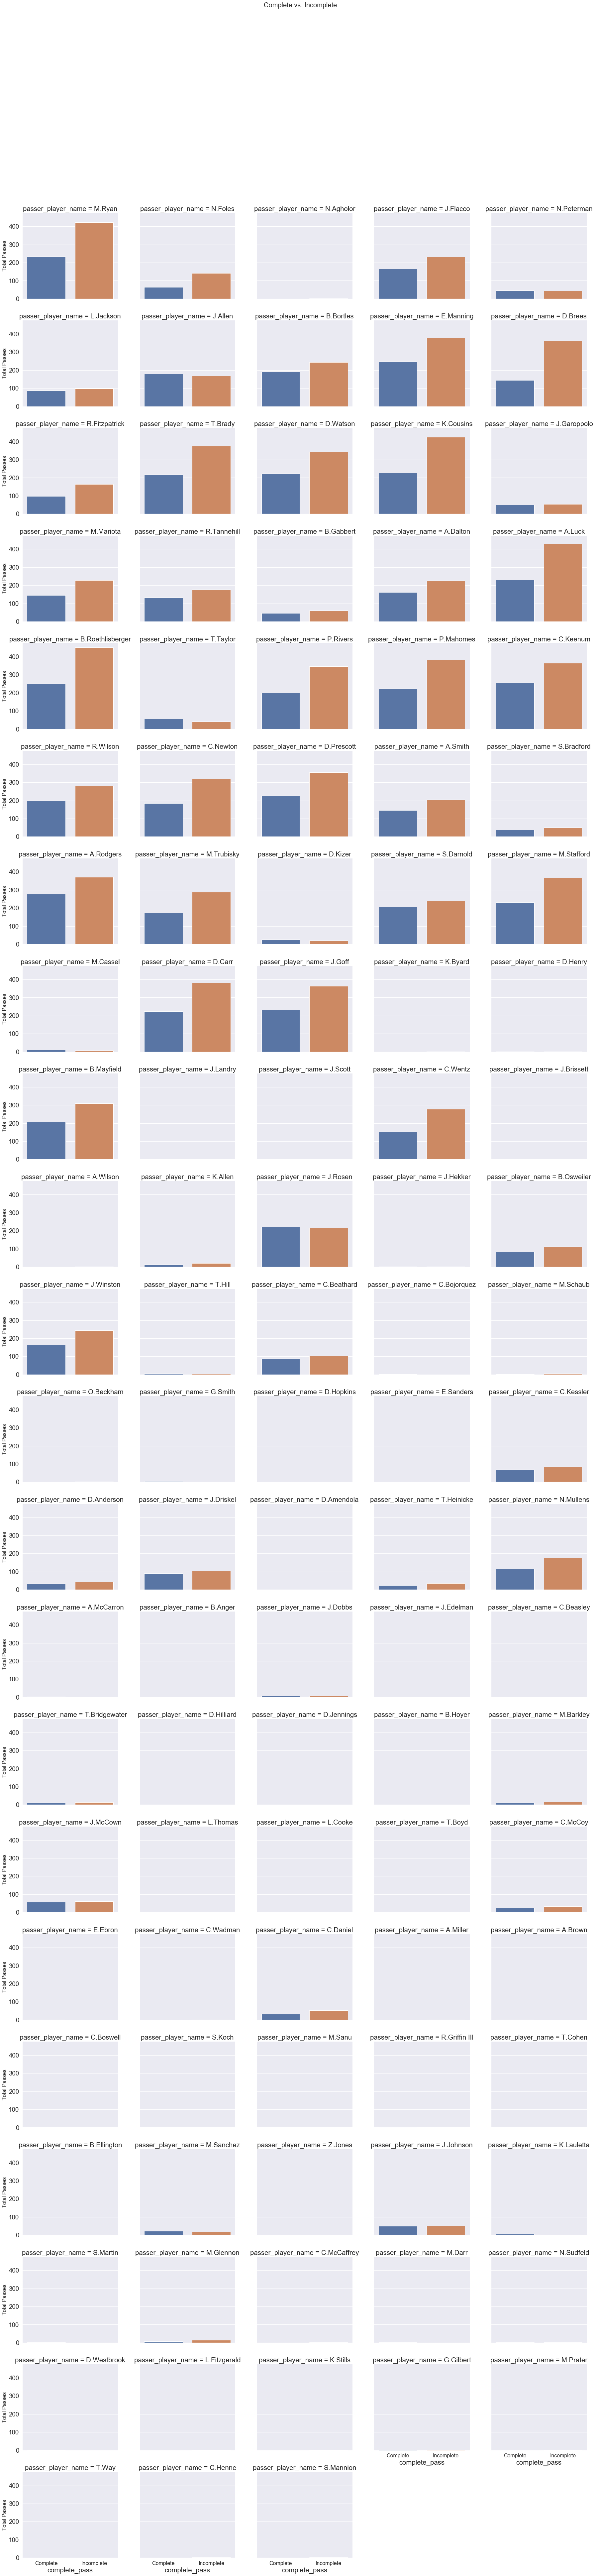

In [98]:
plt.figure(figsize= (12, 12))
sns.set(font_scale = 1.7)
ax = sns.factorplot("complete_pass", col = 'passer_player_name',kind = 'count',  data = pass_data, col_wrap = 5)
ax.set_ylabels('Total Passes', fontsize = 16)
ax.set_xticklabels({ 'Complete' : 1,  'Incomplete' :0}, fontsize = 16)
plt.subplots_adjust(top=0.9)
ax.fig.suptitle('Complete vs. Incomplete', fontsize =20)

#if count = 0 dont show

In [130]:
# Let's create a dataset with every row representing a receiver's performance in a single game. 
passer_info = pass_data.loc[pass_data['complete_pass'] != 999, ['passer_player_name',
                                                              'receiver_player_name',
                                                              'pass_attempt', 'game_id',
                                                              "yards_gained", 'complete_pass',
                                                              'defteam', 'posteam']].groupby(by = ["posteam",
                                                                                                         "defteam",
                                                                                                         'game_id',
                                                                                                         'receiver_player_name',
                                                                                                         'passer_player_name'], as_index = False).sum()
passer_info.sort_values(by = ["passer_player_name", "game_id"], inplace = True)
passer_info.reset_index(drop = True, inplace = True)

packers = passer_info.loc[passer_info.posteam == 'GB']
packers['Targets'] = packers.pop('pass_attempt')

In [131]:
passer_info['last_four_rec'] = range(len(passer_info))
passer_info['last_four_yds'] = range(len(passer_info))
passer_info['last_two_rec'] = range(len(passer_info))
passer_info['last_two_yds'] = range(len(passer_info))

teams_info = pass_data[['yards_gained', "complete_pass", "defteam", "game_id", "pass_attempt"]].groupby(by = ["game_id", "defteam"], as_index = False).sum()
teams_info = teams_info.sort_values(by = ["defteam", "game_id"])
teams_info = teams_info[teams_info['yards_gained'] > 100]
teams_info.reset_index(drop= True, inplace = True)
teams_info['previous_yds'] = range(len(teams_info))
teams_info['previous2_yds'] = range(len(teams_info))
teams_info['previous_rec'] = range(len(teams_info))
teams_info['previous2_rec'] = range(len(teams_info))
teams_info['previous_plays'] = range(len(teams_info))
teams_info['previous4_plays'] = range(len(teams_info))

In [135]:
def recs(x):
   ind = list(passer_info['last_four_rec'].values).index(x)
   not_done = True
   i = 4
   while not_done:
       if ind > 4:
           if passer_info.loc[ind, 'passer_player_name'] == passer_info.loc[ind-i, 'passer_player_name'] :
               
                  return passer_info['complete_pass'].loc[ind - i: ind -1 ].mean()
           elif i == 1:
                  return passer_info['complete_pass'].median()
           i = i -1 
       else:
            return passer_info['complete_pass'].loc[ind - i: ind -1].sum()
def yds(x):
   ind = list(passer_info['last_four_yds'].values).index(x)
   not_done = True
   i = 4
   while not_done:
       if ind > 4:
           if passer_info.loc[ind, 'passer_player_name'] == passer_info.loc[ind-i, 'passer_player_name'] :
               
                  return passer_info['yards_gained'].loc[ind - i: ind -1].mean()
           elif i == 1:
                  return passer_info['yards_gained'].median()
           i = i -1 
       else:
            return passer_info['yards_gained'].loc[ind - i: ind -1].sum()
def yds2(x):
   ind = list(passer_info['last_two_yds'].values).index(x)
   not_done = True
   i = 2
   while not_done:
       if ind > 2:
           if passer_info.loc[ind, 'passer_player_name'] == passer_info.loc[ind-i, 'passer_player_name'] :
               
                  return passer_info['yards_gained'].loc[ind - i: ind -1].mean()
           elif i == 1:
                  return passer_info['yards_gained'].median()
           i = i -1 
       else:
            return passer_info['yards_gained'].loc[ind - i: ind -1].sum()
def recs2(x):
   ind = list(passer_info['last_two_rec'].values).index(x)
   not_done = True
   i = 2
   while not_done:
       if ind > 1:
           if passer_info.loc[ind, 'passer_player_name'] == passer_info.loc[ind-i, 'passer_player_name'] :
               
                  return passer_info['complete_pass'].loc[ind - i: ind -1].mean()
           elif i == 1:
                  return passer_info['complete_pass'].median()
           i = i -1 
       else:
            return passer_info['complete_pass'].loc[: ind -1].mean()
def teams(x):
    ind = list(teams_info['previous_yds'].values).index(x)
    team = teams_info.loc[ind, 'defteam']
    ind2 = list(teams_info['defteam'].values).index(team)
    if ind == 0 :
        return teams_info['yards_gained'].median()
    elif ind > ind2:
        
        return teams_info.loc[ind2: ind-1, 'yards_gained'].mean()
    else:
        return teams_info['yards_gained'].median()
def teams2(x):
    ind = list(teams_info['previous2_yds'].values).index(x)
    not_done = True
    i = 2
    while not_done:
       if ind > 2:
           if teams_info.loc[ind, 'defteam'] == teams_info.loc[ind-i, 'defteam'] :
               
                  return teams_info['yards_gained'].loc[ind - i: ind -1].mean()
           elif i == 1:
                  return teams_info['yards_gained'].median()
           i = i -1 
       else:
            return teams_info['yards_gained'].loc[ind - i: ind -1].mean()
def teamsr(x):
    ind = list(teams_info['previous_rec'].values).index(x)
    team = teams_info.loc[ind, 'defteam']
    ind2 = list(teams_info['defteam'].values).index(team)
    if ind == 0 :
        return teams_info['complete_pass'].median()
    elif ind > ind2:
          return teams_info.loc[ind2: ind-1, 'complete_pass'].mean()
    else:
        return teams_info['complete_pass'].median()
def teamsr2(x):
    ind = list(teams_info['previous2_rec'].values).index(x)
    not_done = True
    i = 2
    while not_done:
       if ind > 2:
           if teams_info.loc[ind, 'defteam'] == teams_info.loc[ind-i, 'defteam'] :
               
               return teams_info.loc[ind -i: ind-1, 'complete_pass'].mean()     
           elif i == 1:
                  return passer_info['complete_pass'].median()
           i = i -1 
       else:
            return teams_info['complete_pass'].loc[ind - i: ind -1].mean()
def teamsp(x):
    ind = list(teams_info['previous_plays'].values).index(x)
    team = teams_info.loc[ind, 'defteam']
    ind2 = list(teams_info['defteam'].values).index(team)
    if ind == 0 :
        return teams_info['pass_attempt'].median()
    elif ind > ind2:
        
        return teams_info.loc[ind2: ind-1, 'pass_attempt'].mean()
    else:
        return teams_info['pass_attempt'].median()
def teamsp2(x):
    ind = list(teams_info['previous4_plays'].values).index(x)
    not_done = True
    i = 4
    while not_done:
       if ind > 4:
           if teams_info.loc[ind, 'defteam'] == teams_info.loc[ind-i, 'defteam'] :
               
                  return teams_info.loc[ind - i: ind -1, 'pass_attempt'].mean()
           elif i == 1:
                  return teams_info['pass_attempt'].median()
           i = i -1 
       else:
            return teams_info['pass_attempt'].loc[ind - i: ind -1].mean()
        
passer_info['last_four_rec'] = passer_info['last_four_rec'].apply(lambda x: recs(x))  
passer_info['last_four_yds'] = passer_info['last_four_yds'].apply(lambda x: yds(x))  
passer_info['last_two_rec'] = passer_info['last_two_rec'].apply(lambda x: recs2(x))  
passer_info['last_two_yds'] = passer_info['last_two_yds'].apply(lambda x: yds2(x)) 



teams_info['previous_yds'] = teams_info['previous_yds'].apply(lambda x: teams(x))
teams_info['previous2_yds'] = teams_info['previous2_yds'].apply(lambda x: teams2(x))
teams_info['previous_rec'] = teams_info['previous_rec'].apply(lambda x: teamsr(x))
teams_info['previous2_rec'] = teams_info['previous2_rec'].apply(lambda x: teamsr2(x))
teams_info['previous_plays'] = teams_info['previous_plays'].apply(lambda x: teamsp(x))
teams_info['previous4_plays'] = teams_info['previous4_plays'].apply(lambda x: teamsp2(x))


teams_info = teams_info.drop(['complete_pass', 'yards_gained', 'pass_attempt'], axis = 1)
passer_info  = passer_info.merge(teams_info, on = ['defteam', "game_id"])

created the above features that we will use to predict the performance of a passer.

* last_four_rec, last_two_rec : the number of completions a QB got in the previous four and two games
* lastfour yds, last_two_yds;  for yards gained.
* previous_yds, previous2_yds; yards allowed by the Defensive team in games before this game and the last two games
* previous_rec, previous2_rec: same as above above
* previous_plays, previous4_plays: Number of pass plays allowed by the 
* defensive team in previous games and last four games respectively.

In [141]:
X = passer_info[['previous_yds', 'previous2_yds', 'previous_rec', 'previous2_rec', 'previous_plays', 'previous4_plays']]
y = passer_info['yards_gained']


In [146]:
null_columns=passer_info.columns[passer_info.isnull().any()]
passer_info[null_columns].isnull().sum()

last_two_rec       1
previous2_yds      7
previous2_rec      7
previous4_plays    7
dtype: int64

In [148]:
passer_info.shape

(4157, 18)

In [150]:
passer_info = passer_info.dropna(how='any',axis=0) 

In [151]:
passer_info.shape

(4149, 18)

In [153]:
passer_info.isna().any()

posteam                 False
defteam                 False
game_id                 False
receiver_player_name    False
passer_player_name      False
pass_attempt            False
yards_gained            False
complete_pass           False
last_four_rec           False
last_four_yds           False
last_two_rec            False
last_two_yds            False
previous_yds            False
previous2_yds           False
previous_rec            False
previous2_rec           False
previous_plays          False
previous4_plays         False
dtype: bool

In [152]:
from sklearn.linear_model import LogisticRegression #

lr = LogisticRegression() #instantiate

from sklearn.svm import SVC

svc = SVC() 
# Train-test split (x then y, train test split)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1987)
lr.fit(X_train,y_train)

lr.score(X_test,y_test)#

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [140]:
# Computing the baseline
print('Baseline:', y.value_counts(normalize=True)[0].round(3))

# Instantiating a Logistic Regression Model
lr = LogisticRegression()

# Instantiating a Support Vector Machine Model
svc = SVC()

# Fitting the models
lr.fit(X_train, y_train)
svc.fit(X_train, y_train)

# Scoring the models:
print('Logistic Regression:', lr.score(X_test, y_test).round(3))
print('Support Vector Machine:', svc.score(X_test, y_test).round(3))

Baseline: 0.116


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').